# Data Skills for Public Policy -- F2019, *Assignment 7*
### Name: Minchen Sun (*UCID: 12179772, CNETID: minchensun*)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot
import bokeh
import seaborn
from bokeh.plotting import figure, show
from ipywidgets import interact, interact_manual
from bokeh.io import show, output_file
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

## Section 1: Load the dataset

In [2]:
path = r'/Users/MicharmSun/Documents/GitHub/assignment-7-minchensun'
path_to_data = os.path.join(path, 'Dataset')
file = 'EducationDataPortal_12.06.2019_institutions.csv'

In [3]:
df = pd.read_csv(os.path.join(path_to_data, file))
df.head()

,year,unitid,inst_name,state_name,number_applied,number_admitted,number_enrolled_total,reqt_hs_rank,reqt_test_scores,reqt_hs_gpa,...,sat_math_25_pctl,sat_math_75_pctl,act_composite_25_pctl,act_composite_75_pctl,act_english_25_pctl,act_english_75_pctl,act_math_25_pctl,act_math_75_pctl,institution_level,completion_rate_150pct
0,2016,142832,Adler University,Illinois,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Four or more years,NaN
1,2016,142887,American Academy of Art,Illinois,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Four or more years,0.619
2,2016,142957,American Islamic College,Illinois,3.0,3.0,3.0,Recommended,Required,Required,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Four or more years,NaN
3,2016,143048,School of the Art Institute of Chicago,Illinois,5244.0,3111.0,634.0,Neither required nor recommended,Required,Neither required nor recommended,...,490.0,600.0,22.0,27.0,22.0,29.0,23.0,31.0,Four or more years,0.656
4,2016,143084,Augustana College,Illinois,6587.0,3400.0,698.0,Recommended,Recommended,Required,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Four or more years,0.749


## Section 2: Explore the data: Summary and Visualization

In [4]:
df = df.sort_values(['year', 'inst_name'], ascending=[True, True])
df[df['inst_name']=='UNIVERSITY OF CHICAGO']

,year,unitid,inst_name,state_name,number_applied,number_admitted,number_enrolled_total,reqt_hs_rank,reqt_test_scores,reqt_hs_gpa,...,sat_math_25_pctl,sat_math_75_pctl,act_composite_25_pctl,act_composite_75_pctl,act_english_25_pctl,act_english_75_pctl,act_math_25_pctl,act_math_75_pctl,institution_level,completion_rate_150pct
1915,2001,144050,UNIVERSITY OF CHICAGO,Illinois,7454.0,3261.0,1081.0,Recommended,Required,Recommended,...,660.0,740.0,28.0,32.0,28.0,33.0,28.0,32.0,Four or more years,0.892
1776,2002,144050,UNIVERSITY OF CHICAGO,Illinois,8140.0,3379.0,1113.0,Recommended,Required,Recommended,...,650.0,750.0,31.0,32.0,27.0,33.0,27.0,33.0,Four or more years,0.871
1646,2003,144050,UNIVERSITY OF CHICAGO,Illinois,9100.0,3605.0,1150.0,Recommended,Required,Recommended,...,650.0,750.0,27.0,32.0,28.0,33.0,27.0,33.0,Four or more years,0.868
1518,2004,144050,UNIVERSITY OF CHICAGO,Illinois,8751.0,3503.0,1217.0,Recommended,Required,Recommended,...,660.0,760.0,28.0,33.0,28.0,34.0,27.0,33.0,Four or more years,0.909


In [5]:
# take a look at what are the columns of this dataset
columnslist = df.columns.to_list()
print(columnslist)

['year', 'unitid', 'inst_name', 'state_name', 'number_applied', 'number_admitted', 'number_enrolled_total', 'reqt_hs_rank', 'reqt_test_scores', 'reqt_hs_gpa', 'reqt_college_prep', 'reqt_recommendations', 'sat_crit_read_25_pctl', 'sat_crit_read_75_pctl', 'sat_math_25_pctl', 'sat_math_75_pctl', 'act_composite_25_pctl', 'act_composite_75_pctl', 'act_english_25_pctl', 'act_english_75_pctl', 'act_math_25_pctl', 'act_math_75_pctl', 'institution_level', 'completion_rate_150pct']


In [6]:
sum_dict = {'number_applied':'mean',
            'number_admitted':'mean',
            'number_enrolled_total':'mean',
            'sat_crit_read_25_pctl':'mean',
            'sat_crit_read_75_pctl':'mean',
            'sat_math_25_pctl':'mean',
            'sat_math_75_pctl':'mean',
            'act_composite_25_pctl':'mean',
            'act_composite_75_pctl':'mean',
            'act_english_25_pctl':'mean',
            'act_english_75_pctl':'mean',
            'act_math_25_pctl':'mean',
            'act_math_75_pctl':'mean',
            'completion_rate_150pct':'mean'}

def sum_data(df, group_by, sum_dict):
    data = df
    sum_table = data.groupby(group_by).agg(sum_dict).dropna().reset_index()
    return sum_table

In [7]:
# summarize data by years: calculate mean for variables of interest
sum_data(df, 'year', sum_dict)

,year,number_applied,number_admitted,number_enrolled_total,sat_crit_read_25_pctl,sat_crit_read_75_pctl,sat_math_25_pctl,sat_math_75_pctl,act_composite_25_pctl,act_composite_75_pctl,act_english_25_pctl,act_english_75_pctl,act_math_25_pctl,act_math_75_pctl,completion_rate_150pct
0,2001,2593.707692,1644.523077,311.548611,521.352941,638.235294,521.176471,643.235294,20.256410,25.384615,19.161290,25.451613,19.064516,25.258065,0.542693
1,2002,1590.758333,1044.616667,417.650000,520.000000,626.190476,525.200000,632.500000,20.260870,25.361702,19.250000,25.297297,19.138889,24.972973,0.503635
2,2003,2768.068493,1798.178082,709.890411,515.625000,624.041667,509.791667,620.958333,20.326923,25.442308,19.627451,25.647059,19.215686,25.254902,0.515082
3,2004,3041.760563,1882.816901,725.704225,500.270270,607.243243,503.189189,614.675676,20.388889,25.685185,19.622642,25.867925,19.283019,25.169811,0.517784
4,2005,3116.486111,1999.111111,804.722222,501.051282,623.256410,508.589744,619.487179,20.446429,25.543860,19.814815,25.981818,19.092593,25.563636,0.531078
5,2006,3253.263889,2105.472222,829.902778,497.868421,619.578947,498.763158,623.500000,20.388889,25.740741,19.811321,26.207547,19.075472,25.566038,0.506974
6,2007,3221.310811,2075.202703,793.837838,500.210526,610.342105,503.333333,614.384615,20.545455,25.654545,20.357143,26.392857,19.509091,25.545455,0.509228
7,2008,3536.283784,2163.364865,809.780822,496.937500,612.062500,496.093750,620.156250,20.470588,25.607843,20.176471,26.254902,19.254902,25.549020,0.507914
8,2009,3981.746479,2420.507042,870.169014,494.054054,612.486486,492.157895,613.421053,20.518519,25.925926,20.207547,26.528302,19.264151,26.037736,0.499354
9,2010,4080.260274,2415.273973,844.643836,492.400000,599.450000,497.575000,606.450000,20.358491,25.566038,19.943396,26.094340,19.339623,25.528302,0.504519


In [8]:
# summarize data by institutions: calculate mean for variables of interest
insts = sum_data(df, 'inst_name', sum_dict)
insts.head(15)

,inst_name,number_applied,number_admitted,number_enrolled_total,sat_crit_read_25_pctl,sat_crit_read_75_pctl,sat_math_25_pctl,sat_math_75_pctl,act_composite_25_pctl,act_composite_75_pctl,act_english_25_pctl,act_english_75_pctl,act_math_25_pctl,act_math_75_pctl,completion_rate_150pct
0,AUGUSTANA COLLEGE,2747.250000,2083.250000,591.500000,515.000000,635.000000,560.000000,650.000000,23.500000,28.750000,22.000000,29.000000,22.666667,28.333333,0.757000
1,AURORA UNIVERSITY,1262.500000,713.250000,281.750000,470.000000,540.000000,460.000000,580.000000,18.750000,22.500000,18.000000,22.250000,17.500000,22.250000,0.489500
2,Aurora University,1966.500000,1507.833333,493.000000,455.000000,543.166667,457.500000,545.833333,19.500000,23.666667,18.833333,23.750000,18.166667,24.000000,0.519583
3,BLACKBURN COLLEGE,852.750000,484.250000,170.250000,493.333333,556.666667,481.666667,543.333333,18.333333,23.666667,18.500000,24.500000,17.500000,23.500000,0.394750
4,BRADLEY UNIVERSITY,5487.000000,3662.000000,808.250000,533.333333,640.000000,540.000000,666.666667,23.000000,28.000000,22.000000,28.500000,22.500000,28.000000,0.716000
5,Benedictine University,1719.100000,1328.400000,493.500000,473.000000,611.000000,461.000000,600.600000,19.700000,25.000000,19.400000,25.800000,19.000000,25.900000,0.536250
6,Blackburn College,853.000000,505.083333,163.416667,442.500000,530.833333,443.571429,539.285714,18.583333,24.250000,18.000000,24.333333,17.166667,24.000000,0.434167
7,Bradley University,7155.916667,4845.416667,1054.500000,500.000000,625.454545,511.666667,640.833333,22.500000,27.750000,22.333333,28.583333,22.416667,27.916667,0.750167
8,CONCORDIA UNIVERSITY,1116.750000,551.500000,224.750000,466.666667,600.000000,473.333333,606.666667,19.333333,25.333333,18.333333,26.000000,18.333333,25.333333,0.515250
9,Chicago State University,3609.750000,1480.416667,402.083333,421.666667,539.333333,450.600000,560.600000,16.750000,19.666667,15.666667,20.333333,15.750000,18.750000,0.164333


**Headline result: 1 matplotlib histogram + 1 seaborn heatmap**

In [9]:
def hist_requirements_overall(df):
    
    data = df
    
    matplotlib.pyplot.figure(figsize=(10, 7))
    matplotlib.pyplot.hist([data['reqt_test_scores'].dropna(),
                            data['reqt_hs_gpa'].dropna(),
                            data['reqt_recommendations'].dropna(),
                            data['reqt_hs_rank'].dropna(),
                            data['reqt_college_prep'].dropna()],
                          color=['pink', 'paleturquoise', 'salmon', 'skyblue', 'orange'])
    matplotlib.pyplot.xticks(rotation=45)
    matplotlib.pyplot.legend(['Test Scores', 'High School GPA', 'Recommendations', 
                              'High School Rank', 'College Prep Program'])
    matplotlib.pyplot.title('2001 -- 2016: Overall Admissions Requirements Distribution')
    matplotlib.pyplot.show()
    matplotlib.pyplot.close();

In [10]:
# Explore data structures/values, preparing for dataframe transformation:
# (Check values of 3 admission requirements columns, to get a sense for data viz)
data = df
admreq = data[['reqt_test_scores','reqt_hs_gpa','reqt_recommendations', 
               'reqt_hs_rank', 'reqt_college_prep']].dropna().reset_index(drop=True)
print('The dataframe with original values is:\n', admreq.head(), '\n')
print('The unique values for column "reqt_test_scores" are:\n', 
      admreq.reqt_test_scores.unique(), '\n')
print('The unique values for column "reqt_hs_gpa" are:\n', 
      admreq.reqt_hs_gpa.unique(), '\n')
print('The unique values for column "reqt_recommendations" are:\n', 
      admreq.reqt_recommendations.unique(), '\n')
print('The unique values for column "reqt_hs_rank" are:\n',
      admreq.reqt_hs_rank.unique(), '\n')
print('The unique values for column "reqt_college_prep" are:\n', 
      admreq.reqt_college_prep.unique(), '\n')

orginal_values = ['Not applicable', 'Missing/not reported', 
                  'Neither required nor recommended', 'Recommended', 'Required']
new_values = [x for x in range(1,6)]


# Transform values for each column from 'str' to 'int' representing different categories,
# preparing for correlations calculation & Heatmap plot.
def replace_column_values(df):
    df.replace(orginal_values, new_values, inplace=True)
    return df

def transform_dataset(df):
    data = df
    admreq = data[['reqt_test_scores','reqt_hs_gpa','reqt_recommendations', 
                   'reqt_hs_rank', 'reqt_college_prep']].dropna().reset_index(drop=True)
    #print('The dataframe with original values is:\n', admreq.head(), '\n')
    admreq = admreq.loc[admreq['reqt_recommendations'] != 'Considered']
    admreq = admreq.loc[admreq['reqt_hs_rank'] != 'Considered']
    admreq = admreq.loc[admreq['reqt_college_prep'] != 'Considered']
    replace_column_values(admreq)
    #print('The dataframe with new values is:\n', admreq.head(), '\n')
    return admreq


# Calculate correlation coefficients:
def correlation_matrix(df):
    admreq = transform_dataset(df)
    correlations = admreq.corr()
    
    # print('The correlation coefficients matrix is:\n', correlations)
    
    return correlations


correlation_matrix(df)

The dataframe with original values is:
        reqt_test_scores           reqt_hs_gpa  reqt_recommendations  \
0        Not applicable        Not applicable        Not applicable   
1  Missing/not reported  Missing/not reported  Missing/not reported   
2           Recommended              Required              Required   
3        Not applicable        Not applicable        Not applicable   
4        Not applicable        Not applicable        Not applicable   

                       reqt_hs_rank                 reqt_college_prep  
0                    Not applicable                    Not applicable  
1              Missing/not reported              Missing/not reported  
2  Neither required nor recommended  Neither required nor recommended  
3                    Not applicable                    Not applicable  
4                    Not applicable                    Not applicable   

The unique values for column "reqt_test_scores" are:
 ['Not applicable' 'Missing/not reported' 'Rec

,reqt_test_scores,reqt_hs_gpa,reqt_recommendations,reqt_hs_rank,reqt_college_prep
reqt_test_scores,1.000000,0.949269,0.893592,0.941125,0.914921
reqt_hs_gpa,0.949269,1.000000,0.877512,0.923133,0.908225
reqt_recommendations,0.893592,0.877512,1.000000,0.854259,0.841502
reqt_hs_rank,0.941125,0.923133,0.854259,1.000000,0.907985
reqt_college_prep,0.914921,0.908225,0.841502,0.907985,1.000000


In [11]:
axis_labels = ['Test Scores', 'High School GPA', 'Recommendations', 'High School Rank', 'College Prep Program']

def heatmap_requirements(df):
    correlations = correlation_matrix(df)
    
    # change color theme
    seaborn.set_style('white')
    # Make the figsize 10 x 5
    matplotlib.pyplot.figure(figsize=(7, 7))
    # generate a mask for the upper triangle
    mask = np.zeros_like(correlations, dtype=np.bool)
    for i in range(1, 3):
        mask[0][i] = True
    for i in range(2, 3):
        mask[1][i] = True

    # plot heatmap of correlations
    seaborn.heatmap(correlations*100, annot=True, fmt='0.0f', mask=mask, cmap='Blues',
                    xticklabels=axis_labels, yticklabels=axis_labels)
    matplotlib.pyplot.xticks(rotation=90)
    matplotlib.pyplot.yticks(rotation=0)
    matplotlib.pyplot.title('Heatmap for Correlations between Admissions Requirements')
    matplotlib.pyplot.show()
    matplotlib.pyplot.close()

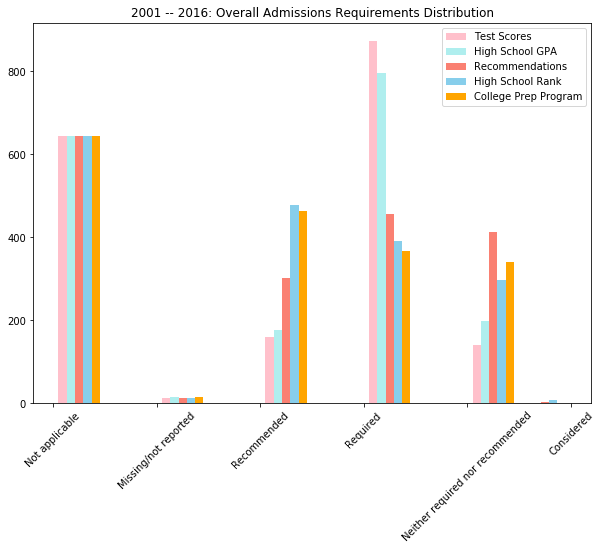

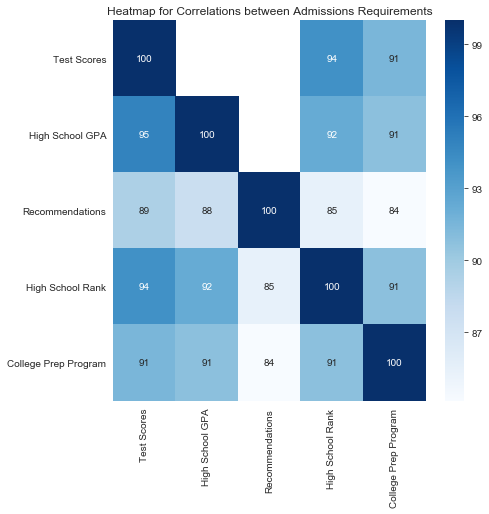

In [12]:
def panel_requirements_hist_heat(df):
    
    hist_requirements_overall(df)
    heatmap_requirements(df)

    return


panel_requirements_hist_heat(df)

> Since we already get an overview about the distribution of Admissions Requirements from 2001 to 2016, it would be interesting to see how the distribution varies across year. It makes sense that admissions requirements evolve over years as universities's tastes and standards to admit students are changing.

I created ***1 interactive Bar Chart from Bokeh, with 2 interactive functions -- both are "Dropdown Menus"***, making it possible to focus on 'single Admissions Requirement' Distribution in 'specific year' that you choose.

> **Note**: Since this bar chart based on cateogories is really similar to what I did in HW5, specifically, I referred to functions 'pct_complaint(df, category)', 'plot_overall_count(df, sort)' and 'plot_overall_count_interactive(Sort=sort_values[1], Category=categories[0])'. However, I also did some modifications on calculations and interactive functions here, to make better sense in this case.

In [13]:
# Create a function to calculate total counts for each requirement, i.e.: Test Scores, High School GPA, etc.
def get_counts(df, category, Choose_Year):
    data = df[df['year'] == Choose_Year]
    count_by_reqt = data.groupby([category])['inst_name'].nunique()
    comp_df = count_by_reqt.reset_index()
    comp_df.columns = ['Category', 'Total_Counts']

    return comp_df

In [14]:
# Create a function to draw bar chart for selected data. 
def plot_count(df, category):
    data = df
    data['color'] = ['lightskyblue', 'lightpink', 'salmon', 'lavender', 'lightcyan']
    
    plot = figure(title='Selected Year: Admissions Requirements Distribution: 2001 -- 2016',
                  x_range=data['Category'], y_axis_label='Total Count',
                  plot_width=600, plot_height=500)

    plot.vbar(x=data['Category'], top=data['Total_Counts'], width=0.5, fill_color=data['color'])

    plot.xgrid.grid_line_color = None
    plot.xaxis.major_label_orientation = 1
    plot.y_range.start = 0
    return plot

# Create an interactive bar chart, where people can choose between different categories and whether to display the data in ascending order
options = [int(x) for x in range(2001, 2017)]
categories = ['reqt_test_scores', 'reqt_hs_gpa', 'reqt_recommendations',
              'reqt_hs_rank', 'reqt_college_prep']


@interact(Choose_Year=options, Category=categories)
def interactive_bar_reqt_year(Choose_Year=options[0], Category=categories[0]):
    df_plot = get_counts(df, Category, Choose_Year)
    plot = plot_count(df_plot, Category)
    show(plot)

interactive(children=(Dropdown(description='Choose_Year', options=(2001, 2002, 2003, 2004, 2005, 2006, 2007, 2…

> After getting some sense about how Admissions Requirements distribute overall and also in specific year, how about getting a close look at one specific and actually almost most critical quantified requirement -- which is SAT score? (including SAT Critical Reading score & SAT Math Score.) It would be interesting to look at the relationship between these 2 parts of scores, whether they are substitutes or complements when judged?

> Also, let's add more information in, do you wanna know how it relate with Completion (quite close to what Graduation means) Rate within normal time? In general, schools requiring higher SAT scores should admit students with better academic performance as well as stronger drive, which further leads to higher completion rates. So I coded the bubble size using Completion Rate when plotting SAT scores.

> With Completion Rate added in, I think it would be useful to add 1 interactive function in, which allows you to 'zoom' and focus on schools with Completion Rates exceeding certain bar that you set; also, as UChicago students, we may want to focus on the single UChicago data point.

***I created 1 interactive Scatter Plot from Bokeh, with 2 interactive functions -- "Slider" and "Checkbox", making it possible to set Completion Rate Bar (you will only see data points for schools with Completion Rates higher than the bar you set), and to choose to see UChicago data point only.***

In [15]:
def color_gen(n):
    colors = bokeh.palettes.viridis(n)
    return colors


# Utilize matplotlib to create a scatter plot with size coded by completion rate
def plot_sat25th_w_completionrate(df, ratebar, uchionly):
    
    # If user only wants to the whole dataset or specify a certain completion rate bar:
    if uchionly == False:
        data = insts[insts['completion_rate_150pct'] >= ratebar]
        colors = color_gen(len(data))
        
        fig = figure(title='SAT Reading vs Math(25th percentile), Completion Rate as circle size',
                     x_axis_label='SAT Math 25th percentage', 
                     y_axis_label='SAT Critical Reading 25th percentage',
                     plot_width=480, plot_height=480)
        
        fig.circle(data['sat_math_25_pctl'], data['sat_crit_read_25_pctl'],
                   size=5+data['completion_rate_150pct']*35, color=colors)


    # If user only wants to see 'UChicago' data point, the plot will only give this single data point:
    else:
        data = insts[insts['inst_name'] == 'University of Chicago']
        colors = color_gen(len(data))
        
        fig = figure(title='SAT Reading vs Math(25th percentile), Completion Rate as circle size',
                     x_axis_label='SAT Math 25th percentage', 
                     y_axis_label='SAT Critical Reading 25th percentage', 
                     plot_width=480, plot_height=480)
                
        fig.circle(data['sat_math_25_pctl'], data['sat_crit_read_25_pctl'],
                   size=3+data['completion_rate_150pct']*25, color=colors)
    
    return fig

completionrate_min = insts['completion_rate_150pct'].min()
completionrate_max = insts['completion_rate_150pct'].max()


# Add an interactive function to focus on universities with an average completion rate
# exceeding a certain bar that you set:
@interact(Rate_Bar=(completionrate_min, completionrate_max), UChicago=False)
def interactive_plot_sat25th_w_completionrate(Rate_Bar=completionrate_min, UChicago=False):
    fig = plot_sat25th_w_completionrate(insts, Rate_Bar, UChicago)
    show(fig)

interactive(children=(FloatSlider(value=0.07591666666666667, description='Rate_Bar', max=0.9358333333333334, m…

## Section 3: Data Preprocessing for Modeling


* **1. The dependent variable**: 'completion_rate_150pct' is a continuous variable, and I will transform it into a categorical variable with 3 classes. Because I want to predict the graduation rates to be in certain classes, i.e.: high, medium, or low. Too detailed numbers for graduation rates are not really useful, so I think it is good enough for us to just have a general sense about the graduation rate level.

* **2. The independent variables**: the independent variables I have selected are nearly in good shapes, most are continuous variables and even normalized already. (for example, SAT scores and ACT scores are normalized values.) Some are not, like admissions requirements variables, they are categorical variables with string values, so I will transform them into categorical variables with ordered integer values which will make our lives easier when modeling.

In [16]:
summary = df['completion_rate_150pct'].describe()
print(summary)

count    1266.000000
mean        0.516133
std         0.202166
min         0.031000
25%         0.400000
50%         0.526500
75%         0.636000
max         1.000000
Name: completion_rate_150pct, dtype: float64


**1. Transform the dependent variable 'completion_rate_150pct' (Graduation Rate within 150% normal time) into a categorical variable 'Y' which classifies graduation rates into 3 classes: 
【1 represents low rate, 2 represents medium rate, 3 represents high rate.】**

***Note***: these 3 categories are based on the quartile information about 'completion_rate_150pct',
rates lower than the 25th percentile are defined as low, rates higher than the 75th percentile are defined as high,
and rates between the 25th and 75th percentile are defined as medium.

In [17]:
def transform_Y(df):
    data = df
    low_upperbound = summary.loc['25%']
    high_lowerbound = summary.loc['75%']
    data.loc[data['completion_rate_150pct'] <= low_upperbound, 'Y'] = 1
    data.loc[data['completion_rate_150pct'] >= high_lowerbound, 'Y'] = 3
    data.loc[(data['completion_rate_150pct'] > low_upperbound) & 
         (data['completion_rate_150pct'] < high_lowerbound), 'Y'] = 2
    return data

df = transform_Y(df)
df.head()

,year,unitid,inst_name,state_name,number_applied,number_admitted,number_enrolled_total,reqt_hs_rank,reqt_test_scores,reqt_hs_gpa,...,sat_math_75_pctl,act_composite_25_pctl,act_composite_75_pctl,act_english_25_pctl,act_english_75_pctl,act_math_25_pctl,act_math_75_pctl,institution_level,completion_rate_150pct,Y
1897,2001,142832,ADLER SCHOOL OF PROFESSIONAL PSYCHOLOGY,Illinois,NaN,NaN,0.0,Not applicable,Not applicable,Not applicable,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Four or more years,NaN,NaN
1898,2001,142887,AMERICAN ACADEMY OF ART,Illinois,171.0,171.0,87.0,Missing/not reported,Missing/not reported,Missing/not reported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Four or more years,0.61,2.0
1899,2001,142957,AMERICAN ISLAMIC COLLEGE,Illinois,NaN,NaN,0.0,Neither required nor recommended,Recommended,Required,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Four or more years,1.00,3.0
1943,2001,145770,ARGOSY UNIVERSITY-ISPP-CHICAGO CAMPUS,Illinois,NaN,NaN,0.0,Not applicable,Not applicable,Not applicable,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Four or more years,NaN,NaN
2026,2001,420866,ARGOSY UNIVERSITY-ISPP-CHICAGO NORTHWEST CAMPUS,Illinois,NaN,NaN,0.0,Not applicable,Not applicable,Not applicable,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Four or more years,NaN,NaN


**2. Transform admissions requirements independent variables into categorical variables with integer values.**

In [18]:
# Select columns of interest for modeling
columnslist = df.columns.to_list()
columnslist

def columns_selection(columnslist, drop_list):
    for a in drop_list:
        columns_hist = columnslist
        columns_hist.remove(a)
    return columns_hist
    print(columns_hist)


drop_list = ['unitid', 'inst_name', 'state_name', 'institution_level']
newcolumns = columns_selection(columnslist, drop_list)
newcolumns

['year',
 'number_applied',
 'number_admitted',
 'number_enrolled_total',
 'reqt_hs_rank',
 'reqt_test_scores',
 'reqt_hs_gpa',
 'reqt_college_prep',
 'reqt_recommendations',
 'sat_crit_read_25_pctl',
 'sat_crit_read_75_pctl',
 'sat_math_25_pctl',
 'sat_math_75_pctl',
 'act_composite_25_pctl',
 'act_composite_75_pctl',
 'act_english_25_pctl',
 'act_english_75_pctl',
 'act_math_25_pctl',
 'act_math_75_pctl',
 'completion_rate_150pct',
 'Y']

In [19]:
orginal_values = ['Not applicable', 'Missing/not reported', 
                  'Neither required nor recommended', 'Recommended', 'Required']
new_values = [x for x in range(1,6)]


# Transform values for each column from 'str' to 'int' representing different categories,
def transform_Xs(df, Xs_list):
    data = df
    data = data[Xs_list].dropna().reset_index(drop=True)
    data = data.loc[data['reqt_recommendations'] != 'Considered']
    data = data.loc[data['reqt_hs_rank'] != 'Considered']
    data = data.loc[data['reqt_college_prep'] != 'Considered']
    replace_column_values(data)
    return data

df = transform_Xs(df, newcolumns)
df.head()

,year,number_applied,number_admitted,number_enrolled_total,reqt_hs_rank,reqt_test_scores,reqt_hs_gpa,reqt_college_prep,reqt_recommendations,sat_crit_read_25_pctl,...,sat_math_25_pctl,sat_math_75_pctl,act_composite_25_pctl,act_composite_75_pctl,act_english_25_pctl,act_english_75_pctl,act_math_25_pctl,act_math_75_pctl,completion_rate_150pct,Y
0,2001,8076.0,5880.0,1943.0,4,5,5,4,5,510.0,...,500.0,610.0,21.0,26.0,20.0,27.0,20.0,27.0,0.628,2.0
1,2001,2562.0,1583.0,295.0,4,5,5,4,5,598.0,...,640.0,740.0,26.0,31.0,25.0,30.0,27.0,32.0,0.562,2.0
2,2001,407.0,293.0,105.0,5,5,5,3,4,405.0,...,430.0,535.0,16.0,22.0,15.0,22.0,16.0,23.0,0.436,2.0
3,2001,1532.0,1097.0,275.0,4,5,3,5,5,550.0,...,560.0,660.0,23.0,29.0,23.0,29.0,21.0,28.0,0.701,3.0
4,2001,1339.0,873.0,387.0,5,5,5,4,4,480.0,...,460.0,610.0,19.0,24.0,19.0,24.0,18.0,24.0,0.545,2.0


## Section 4: Test Harness: Model Selection

**Since I want to predict the categorical dependent variable, I decide to use *Supervised Learning -- Classfication*.**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [21]:
# get Xs and Y ready for Classfication
X = df.drop('Y', axis=1)
Y = df['Y']
print(X.shape)
print(Y.shape)

(526, 20)
(526,)


In [22]:
def train_test_shape(X, Y, testsize=0.20, randomstate=123):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=testsize, random_state=randomstate)

    print('X_train:', X_train.shape)
    print('Y_train', Y_train.shape)

    print('X_test', X_test.shape)
    print('Y_test', Y_test.shape)


train_test_shape(X, Y)

X_train: (420, 20)
Y_train (420,)
X_test (106, 20)
Y_test (106,)


In [23]:
models = [('Dec Tree', DecisionTreeClassifier()), 
          ('Lin Disc', LinearDiscriminantAnalysis()), 
          ('Gauss', GaussianNB()), 
          ('SVC', SVC(gamma='auto'))]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

def model_selection_table(models, X_train, Y_train):
    results = []
    
    for name, model in models:
        kf = StratifiedKFold(n_splits=10, random_state=123)
        res = cross_val_score(model, X_train, Y_train, cv=kf, scoring='accuracy')
        res_mean = round(res.mean(), 4)
        res_std  = round(res.std(), 4)
        results.append((name, res_mean, res_std))
    
    for line in results:
        print(line[0].ljust(10), str(line[1]).ljust(6), str(line[2]))
        

model_selection_table(models, X_train, Y_train)

Dec Tree   0.9953 0.0094
Lin Disc   0.9142 0.0511
Gauss      0.7643 0.0536
SVC        0.5691 0.009


**As we can see from the above data table, Decision Tree has highest prediction accuracy of 99.53% under cross-validation, so I will train a Decision Tree in the following section.**

## Section 5: Fit a Supervised ML Model: Classfication -- Decision Tree

In [24]:
def fit_predict_DecTree(X_train, Y_train, X_test):
    model = DecisionTreeClassifier()
    model.fit(X_train, Y_train)
    predict = model.predict(X_test)
    return predict


predict = fit_predict_DecTree(X_train, Y_train, X_test)
predict

array([2., 2., 3., 2., 3., 3., 3., 3., 1., 3., 3., 1., 3., 2., 2., 3., 2.,
       3., 1., 2., 2., 3., 3., 3., 2., 3., 2., 2., 2., 2., 2., 2., 2., 1.,
       2., 2., 2., 3., 2., 2., 2., 3., 3., 2., 3., 2., 2., 3., 2., 1., 3.,
       3., 2., 3., 2., 2., 3., 2., 3., 2., 2., 3., 2., 2., 2., 2., 2., 2.,
       3., 3., 2., 3., 2., 1., 3., 3., 3., 3., 2., 1., 1., 3., 2., 3., 2.,
       3., 2., 3., 2., 2., 2., 3., 2., 2., 3., 1., 3., 2., 2., 2., 2., 3.,
       3., 2., 3., 3.])

In [25]:
accuracy_score(Y_test, predict)

0.9905660377358491

In [26]:
confusion_matrix(Y_test, predict)

array([[ 9,  0,  0],
       [ 0, 54,  1],
       [ 0,  0, 42]])

In [27]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         9
         2.0       1.00      0.98      0.99        55
         3.0       0.98      1.00      0.99        42

   micro avg       0.99      0.99      0.99       106
   macro avg       0.99      0.99      0.99       106
weighted avg       0.99      0.99      0.99       106



**As we can see, the Supervised ML model that I chose, (specifically, Classfication: Decision Tree) has been fitted well. It has an accuracy of 99% for our test subset when predicting the dependent variable that I am interested in, which is the level of graduation rate for institutions.**

**The exploratory data analysis including summary statistics and data visualization that I did in step 2 kinda make me feel comfortable by giving some sense that graduation rates actually have some correlations with other variables, and institutions do differ from each other in many dimensions, so the variables should have some explanatory power here for the variable that I feel insterested to predict. And the test harness in step 4 does prove that several models did good work in predicting the graduation rates, for example, Decision Tree has a 0.9953 precision and Linear Discriminant Analysis has a 0.9142 precision.**

**The accuracy measure that I used to evaluate the model results is the proportion that the set of labels predicted for the test set exactly match the corresponding true set of labels. I used this because the model that I fitted is Classification, the probability that the model can correctly classify the observation into the right category matters to me. Basically, what I used is sklearn.metrics.accuracy_score().**